In [47]:
# Importer nødvendige biblioteker, denne cellen må kjøres før annen kode.
import numpy as np
import matplotlib.pyplot as plt

# UTLEVERT KODE (ingenting her skal endres)
# punktsannsynlighet
f_x = np.array([0.05, 0.10, 0.25, 0.40, 0.15, 0.05])
# kumulativ fordelingsfunksjon
F_x = [np.sum(f_x[:i]) for i in range(1, 7)]


def simX(n):
    # verdimengde
    x = np.arange(6)
    # for lagring av realisasjoner
    x_sim = np.zeros(n)
    for i in range(n):  # vi simulerer hver og en x for seg
        u = np.random.uniform()  # en realisasjon fra U(0,1)
        if u < F_x[0]:  # hvis u er mindre enn den laveste
            # verdien i F_x vil
            # vi at realisasjonen skal være 0
            x_sim[i] = x[0]
        elif u <= F_x[1]:  # hvis u er mindre enn den nest
            # laveste verdien (men større enn laveste)
            # vil vi at x skal bli 1
            x_sim[i] = x[1]
        elif u <= F_x[2]:
            x_sim[i] = x[2]
        elif u <= F_x[3]:
            x_sim[i] = x[3]
        elif u <= F_x[4]:
            x_sim[i] = x[4]
        elif u > F_x[4]:
            x_sim[i] = x[5]
    return x_sim


# Oppgave 1

In [48]:
# Antall realisasjoner man skal bruke
n = 1000

# Simuler realisasjoner av X ved å kalle på simX-funksjonen i cellen over
simulerte_X = simX(n)

# Approksimer sannsynligheten
P_X_le_2 = np.sum(simulerte_X <= 2) / n

# Skriv ut resultatet
print("Approksimert sannsynlighet: " , P_X_le_2)

Approksimert sannsynlighet:  0.383


# Oppgave 2

In [53]:
# Vi finner forventingsverdien til X
ev = 0
for x in np.arange(6):
    ev += (np.sum(simulerte_X == x) / n) * x
print(f"E[X] = {round(ev,3)}")

# Vi finner variansen til X
var = -(ev**2)
for x in np.arange(6):
    var += ((np.sum(simulerte_X == x) / n) * x**2)
print(f"Var[X] = {round(var,3)}")
print(f"SD[X] = {round(np.sqrt(var),3)}")

E[X] = 2.672
Var[X] = 1.262
SD[X] = 1.124


# Oppgave 3

In [54]:
# Definerer F_X(x)
def F_X(x, alpha):
    if x >= 0:
        return 1 - np.exp(-(x**2)/alpha)
    else:
        return 0
    
# Definerer PDF til F_X(x)
def f_X(x, alpha):
    if x >= 0:
        return (2*x/alpha)*np.exp(-(x**2)/alpha)
    else:
        return 0
    
# Definerer U
def U():
    return np.random.uniform(0, 1)

def X(alpha):
    return np.sqrt(-alpha * np.log(1 - U()))

# Simuler n antall realisasjoner av X
def sim_rel_X(n, alpha):
    x_values = []
    for i in range(n):
        x_values.append(X(alpha))

    return x_values

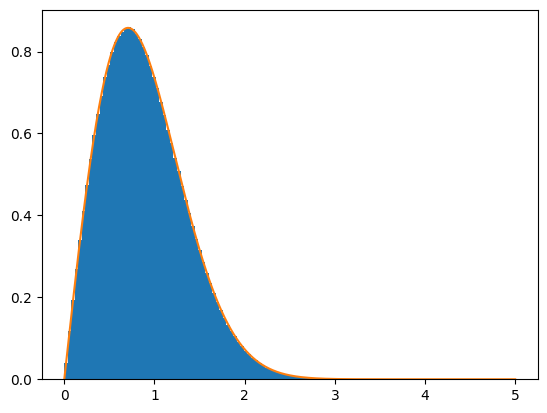

In [61]:
# 10 000 000 realisasjoner
n = 10000000

# alpha verdien
alpha = 1

# Simulerer x verdier
simulerte_x_verdier = sim_rel_X(n, alpha)

# plot histogram med b=100
import matplotlib.pyplot as plt
plt.hist(simulerte_x_verdier, density=True, bins=100)

# plot analytisk løsning
x = np.linspace(0,5,1000)
y = [f_X(xi, alpha) for xi in x]
plt.plot(x,y)

In [71]:
# Ulik kvalitetsparamter på ulike komponenter
alpha1 = 1
alpha2 = 1.2

# Vi definerer simulering av Y: Levetiden til et instrument (3 av 5 komponenter må fungere)
def simY(n):
    levetid = np.zeros(n)
    for i in range(n):
        # Get the third value in the sorted list
        levetid[i] = sorted([
            X(alpha1), 
            X(alpha1), 
            X(alpha2), 
            X(alpha2), 
            X(alpha2)
        ])[2]

    return levetid

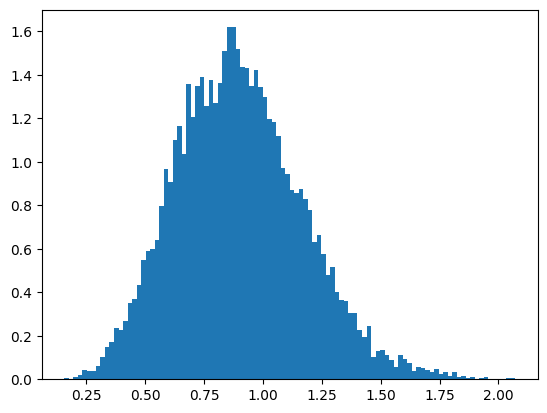

P(Y >= 1) = 0.33
P(Y >= 1 gitt Y >= 0.75) = 0.48


In [76]:
# 10 000 realisasjoner
n = 10000

# Simulerer y verdier
simulerte_y_verdier = simY(n)

# plot histogram med b=100
plt.hist(simulerte_y_verdier, density=True, bins=100)
plt.show()

# Finner P(Y >= 1) og P(Y >= 1 gitt Y >= 0.75)
print(f"P(Y >= 1) = {round(sum(simulerte_y_verdier >= 1) / n, 2)}")
print(f"P(Y >= 1 gitt Y >= 0.75) = {round(sum(simulerte_y_verdier >= 1) / sum(simulerte_y_verdier >= .75), 2)}")

# Oppgave 4

In [77]:
print(f"E[Y] = {round(np.mean(simulerte_y_verdier),2)}")
print(f"Var[Y] = {round(np.std(simulerte_y_verdier),2)}")

E[Y] = 0.9
Var[Y] = 0.27
